# Reproduce CheXNet: Explore Predictions

## Import other modules and pandas

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import visualize_prediction as V

import pandas as pd

#suppress pytorch warnings about source code changes
import warnings
warnings.filterwarnings('ignore')

## Settings for review
We can examine individual results in more detail, seeing probabilities of disease for test images. 

We get you started with a small number of the images from the large NIH dataset. 

To explore the full dataset, [download images from NIH (large, ~40gb compressed)](https://nihcc.app.box.com/v/ChestXray-NIHCC), extract all tar.gz files to a single folder, place that path  below and set STARTER_IMAGES=False

In [2]:
#STARTER_IMAGES=True
#PATH_TO_IMAGES = "starter_images/"

IMAGE_DF_FULL = pd.read_csv('../MMMTL_Data_Slicing/CheXNet/cxr-8-data/subset_analysis_data.csv')
IMAGE_DF = IMAGE_DF_FULL.filter(['Image Index'])

PATH_TO_IMAGES = "/lfs/1/jdunnmon/data/nih/images/images"

PATH_TO_LABELS = 'nih_labels.csv'
LABEL_DF = pd.read_csv(PATH_TO_LABELS)

DF_FULL = pd.merge(left=LABEL_DF,right=IMAGE_DF_FULL, how="inner",on="Image Index")

Load pretrained model (part of cloned repo; should not need to change path unless you want to point to one you retrained)

In [3]:
PATH_TO_MODEL = "pretrained/checkpoint"

Pick the finding you want to see positive examples of:

LABEL can be set to any of:
- Atelectasis
- Cardiomegaly
- Consolidation
- Edema
- Effusion
- Emphysema
- Fibrosis
- Hernia
- Infiltration
- Mass
- Nodule
- Pleural_Thickening
- Pneumonia
- Pneumothorax


In [4]:
LABEL="Pneumothorax"

It's more interesting when initially exploring to see cases positive for pathology of interest:

In [5]:
POSITIVE_FINDINGS_ONLY=True

## Load data

This loads up dataloader and model (note: only test images not used for model training are loaded).

In [6]:
dataloader,model= V.load_data(PATH_TO_IMAGES,LABEL,PATH_TO_MODEL,POSITIVE_FINDINGS_ONLY,IMAGE_DF)
print("Cases for review:")
print(len(dataloader))

Cases for review:
1088


## Examine individual cases

To explore, run code below to see a random case positive for your selected finding, a heatmap indicating the most influential regions of the image, and the model's estimated probabilities for findings. For many diagnoses, you can see that the model uses features outside the expected region to calibrate its predictions -- [you can read my discussion about this here](https://medium.com/@jrzech/what-are-radiological-deep-learning-models-actually-learning-f97a546c5b98).

Please note that:
1) the NIH dataset was noisily labeled by automatically extracting labels from text reports written by radiologists, as described in paper [here](https://arxiv.org/pdf/1705.02315.pdf) and analyzed [here](https://lukeoakdenrayner.wordpress.com/2017/12/18/the-chestxray14-dataset-problems/), so we should not be surprised to see inaccuracies in the provided ground truth labels 
2) high AUCs can be achieved even if many positive cases are assigned absolutely low probabilities of disease, as AUC depends on the relative ranking of probabilities between cases. 

You can run the below cell repeatedly to see different examples:

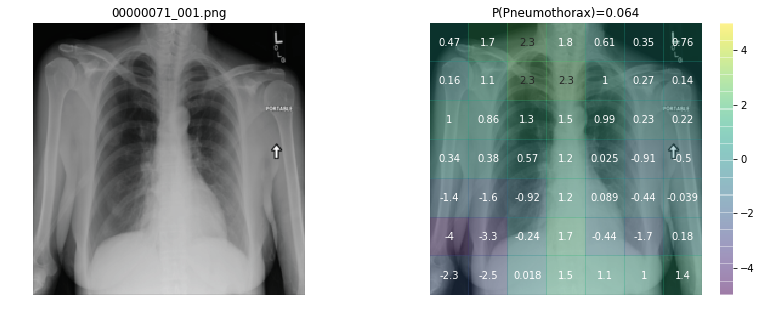

In [7]:
preds=V.show_next(dataloader,model, LABEL)

In [8]:
DF_PRINT = DF_FULL.filter(['Image Index','Pneumothorax','drain','pigtail','subcut','fold','pred'])
DF_PRINT[DF_PRINT['Image Index'] ==preds[1]]

,Image Index,Pneumothorax,drain,pigtail,subcut,fold,pred
0,00000071_001.png,1.0,0,0,0,test,0.064088


In [9]:
preds[0]

,Predicted Probability,Ground Truth
Finding,,
Infiltration,0.107,False
Pneumothorax,0.064,True
Nodule,0.056,False
Mass,0.047,False
Atelectasis,0.040,False
Emphysema,0.031,False
Effusion,0.021,False
Fibrosis,0.017,False
Pleural_Thickening,0.012,False


## Exploring Predictions

In [10]:
from eval_model import make_pred_multilabel
dataloader,model= V.load_data(PATH_TO_IMAGES,LABEL,PATH_TO_MODEL,False,None)
model.cuda()
preds, aucs = make_pred_multilabel(dataloader, model, PATH_TO_IMAGES, loader=True, save=False)

Evaluated 0 of 22433 Examples...
Evaluated 1600 of 22433 Examples...
Evaluated 3200 of 22433 Examples...
Evaluated 4800 of 22433 Examples...
Evaluated 6400 of 22433 Examples...
Evaluated 8000 of 22433 Examples...
Evaluated 9600 of 22433 Examples...
Evaluated 11200 of 22433 Examples...
Evaluated 12800 of 22433 Examples...
Evaluated 14400 of 22433 Examples...
Evaluated 16000 of 22433 Examples...
Evaluated 17600 of 22433 Examples...
Evaluated 19200 of 22433 Examples...
Evaluated 20800 of 22433 Examples...
Evaluated 22400 of 22433 Examples...
Over dataset size, ignoring...
22433
Over dataset size, ignoring...
22434
Over dataset size, ignoring...
22435
Over dataset size, ignoring...
22436
Over dataset size, ignoring...
22437
Over dataset size, ignoring...
22438
Over dataset size, ignoring...
22439
Over dataset size, ignoring...
22440
Over dataset size, ignoring...
22441
Over dataset size, ignoring...
22442
Over dataset size, ignoring...
22443
Over dataset size, ignoring...
22444
Over datase

In [16]:
IMAGE_DF_ALL = pd.merge(left=preds,right=DF_PRINT, how="inner",on="Image Index")
NIH_DF_ALL = pd.merge(left=preds, right=LABEL_DF, how="inner", on="Image Index")

In [17]:
IMAGE_DF_ALL.filter(['Image Index','Pneumothorax','prob_Pneumothorax','drain','pigtail','subcut','fold','pred'])

,Image Index,Pneumothorax,prob_Pneumothorax,drain,pigtail,subcut,fold,pred
0,00000211_019.png,1.0,0.008431,1,0,0,test,0.135613
1,00000211_023.png,1.0,0.000348,0,0,0,test,0.012777
2,00000285_005.png,1.0,0.003241,0,0,0,test,0.003009
3,00000285_006.png,1.0,0.001005,0,0,0,test,0.001984
4,00000285_007.png,1.0,0.002279,0,0,0,test,0.000454
5,00000372_002.png,1.0,0.006160,1,0,0,test,0.164058
6,00000372_003.png,1.0,0.000814,1,0,0,test,0.523885
7,00000372_004.png,1.0,0.003333,0,0,0,test,0.291824
8,00000404_002.png,1.0,0.291824,0,0,0,test,0.350120
9,00000493_000.png,1.0,0.307960,0,0,0,test,0.004935


In [13]:
import sklearn.metrics as sklm
# Threshold
thresh = 0.5


# Getting classification report for only pneumo images labeled by LOR
pred = IMAGE_DF_ALL['prob_Pneumothorax'] > thresh
actual = IMAGE_DF_ALL['Pneumothorax'] 
print(sklm.classification_report(actual.as_matrix().astype(int), pred.as_matrix().astype(int)))

print('\n ######################################################\n')
# Getting classification report for all pneumo images
pred = NIH_DF_ALL['prob_Pneumothorax'] > thresh
actual = NIH_DF_ALL['Pneumothorax'] 
print(sklm.classification_report(actual.as_matrix().astype(int), pred.as_matrix().astype(int)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.03      0.06      1087

avg / total       1.00      0.03      0.06      1087


 ######################################################

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     21315
          1       0.08      0.03      0.04      1088

avg / total       0.91      0.94      0.92     22403



In [14]:
roc_pneumo = sklm.roc_curve(NIH_DF_ALL['Pneumothorax'],  NIH_DF_ALL['prob_Pneumothorax'])
auc_pneumo = sklm.roc_auc_score(NIH_DF_ALL['Pneumothorax'],  NIH_DF_ALL['prob_Pneumothorax'])

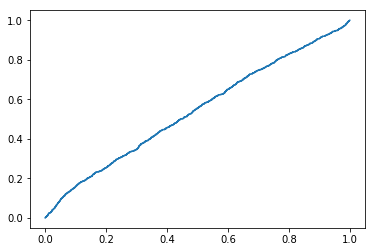

In [15]:
import matplotlib.pyplot as plt
plt.plot(roc_pneumo[0],roc_pneumo[1])

In [107]:
NIH_DF_ALL[NIH_DF_ALL['Image Index']=='00000071_001.png']

,Image Index,prob_Atelectasis,prob_Cardiomegaly,prob_Consolidation,prob_Edema,prob_Effusion,prob_Emphysema,prob_Fibrosis,prob_Hernia,prob_Infiltration,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,fold


(array([906.,  60.,  36.,  26.,  20.,  11.,  14.,   6.,   4.,   4.]),
 array([1.01410296e-05, 9.16993156e-02, 1.83388490e-01, 2.75077665e-01,
        3.66766839e-01, 4.58456014e-01, 5.50145188e-01, 6.41834363e-01,
        7.33523537e-01, 8.25212712e-01, 9.16901886e-01]),
 <a list of 10 Patch objects>)

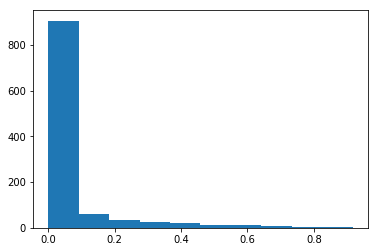

In [103]:
import matplotlib.pyplot as plt
plt.hist(IMAGE_DF_ALL['prob_Pneumothorax'])

(array([416., 174.,  92.,  86.,  92.,  86.,  67.,  42.,  20.,  12.]),
 array([3.55455937e-04, 9.62433222e-02, 1.92131188e-01, 2.88019055e-01,
        3.83906921e-01, 4.79794787e-01, 5.75682653e-01, 6.71570520e-01,
        7.67458386e-01, 8.63346252e-01, 9.59234118e-01]),
 <a list of 10 Patch objects>)

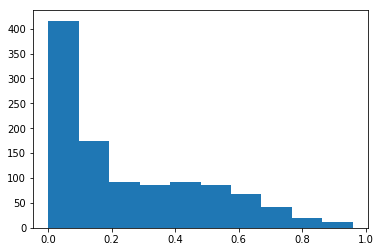

In [104]:
plt.hist(IMAGE_DF_ALL['pred'])

In [1]:
aucs

NameError: name 'aucs' is not defined

In [93]:
sklm.roc_curve?

Signature:
sklm.roc_curve(
    y_true,
    y_score,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC)

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------

y_true : array, shape = [n_samples]
    True binary labels in range {0, 1} or {-1, 1}.  If labels are not
    binary, pos_label should be explicitly given.

y_score : array, shape = [n_samples]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    Label considered as positive and others are considered negative.

sample_weight : array-like of shape = [n_samples], optional
    Sample weights.

drop_intermediate : boolean, optional (default=True)
    Whether to drop some 